In [40]:
# import os
import sys
import importlib
sys.path.append("/tmp/pycharm_project_568/Classification/")
# # from dataset_tool.dataset_loader import *
# import importer
# from dataset_tool.dataset_loader import *
import dataset_tool.dataset_loader
importlib.reload(dataset_tool.dataset_loader)

<module 'dataset_tool.dataset_loader' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_loader.py'>

In [41]:
dataset = dataset_tool.dataset_loader.load_dataset5()

test
Shape of array is (7242,)
COnfig path /tmp/pycharm_project_568/Classification/dataset_config
to_learch water,forest,field,city
Processing water
Size of water is 155000
Processing forest
Size of forest is 456100
Processing field
Size of field is 837600
Processing city
Size of city is 307500
Train size: 1404960. Test size: 351240


In [42]:
from dataset_tool.dataset_tree_transformer import *
importlib.reload(dataset_tool.dataset_tree_transformer)


<module 'dataset_tool.dataset_tree_transformer' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_tree_transformer.py'>

In [43]:
dataset_tree = DatasetTreeAdapter(dataset)

COnfig path /tmp/pycharm_project_568/Classification/dataset_config
categories tree string ["water",["forest",["field","city"]]]
List array ['water', ['forest', ['field', 'city']]].
Creating dataset: train len: 1404960 test len: 351240
Creating dataset: train len: 1280646 test len: 320554
Creating dataset: train len: 915772 test len: 229328


In [44]:
dataset_tree.dataset_tree

In [45]:
#importlib.reload(dataset_tool.KNNClassifier)
from dataset_tool.KNNClassifier import *





In [46]:
knn_classifier = KNNClassifier(dataset_tree.dataset_tree)

In [47]:
knn_classifier.fit()

Models [KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]


In [48]:
knn_classifier.predict_test()

Start prediction test data:
Models [KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]
Working with: idx 0 and shape (351240, 12)...
Working with: idx 1 and shape (320554, 12)...
Working with: idx 2 and shape (229328, 12)...


In [49]:
import cuml
type(knn_classifier.models[0]) == cuml.internals.base_helpers.BaseMetaClass

False

In [50]:
from dataset_tool.classification_report_creator import *

In [51]:
knn_report_creator = ClassificationReportCreator(knn_classifier.predictions,dataset_tree.dataset_tree)

In [52]:
knn_report_creator.display_tree_predictions()

Get accureacy for 0 iteration
Accureacy 0.9985565543174744
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     30535
           2       1.00      1.00      1.00    320705

    accuracy                           1.00    351240
   macro avg       0.99      1.00      1.00    351240
weighted avg       1.00      1.00      1.00    351240

Get accureacy for 1 iteration
Accureacy 0.9670695066452026
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     91198
           2       0.98      0.98      0.98    229356

    accuracy                           0.97    320554
   macro avg       0.96      0.96      0.96    320554
weighted avg       0.97      0.97      0.97    320554

Get accureacy for 2 iteration
Accureacy 0.9959751963615417
              precision    recall  f1-score   support

           1       1.00      0.99      1.00    168476
           2       0.99      1.00      0.99     60852

    a

In [53]:
import numpy as np
arrr = np.asarray([1,2,3,4,5,6])

In [54]:
np.delete(arrr,[0,3,5])

array([2, 3, 5])

In [55]:
from dataset_tool.real_prediction import *
#importlib.reload(dataset_tool.real_prediction)

In [56]:
knn_classifier.models

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [57]:
real_prediction_knn = RealPrediction("/tmp/shared/dataset4/2", knn_classifier.models)

In [58]:
knn_classifier.models

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [59]:
real_prediction_knn.predict()

In [60]:
real_prediction_knn

In [61]:
real_prediction_knn.flatten()

Predcition: 2. Len of idxs: 0. New array shape: (450127,)
Predcition: 1. Len of idxs: 189101. New array shape: (639228,)
Predcition: 0. Len of idxs: 58744. New array shape: (697972,)


In [62]:
im = real_prediction_knn.to2d()

In [63]:
real_prediction_knn.height

638

In [64]:
# arr1 = np.asarray([1,2,3])
# arr1_idx = np.asarray([2,4,5])
# arr2 = np.asarray([11,22,33,44,55,66,77,88])
# shapes = arr1.shape[0]+arr2.shape[0]
# arr3 = np.empty(shapes, dtype=float)
# arr3[arr1_idx] = arr1
# arr3[~np.isin(np.arange(arr3.shape[0]), arr1_idx)] = arr2
# arr3

In [65]:
predictions = real_prediction_knn.predictions

In [66]:
len(predictions[2][0])

0

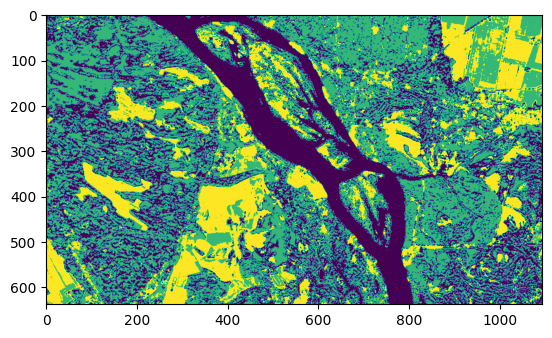

In [67]:
import matplotlib.pyplot as plt

plt.imshow(im)

In [68]:
real_prediction_knn.predict_proba()

In [69]:
real_prediction_knn.flatten_proba()

Predcition: [0.95000017 0.05      ]. Len of idxs: 2. New array shape: (2,)


IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
real_prediction_knn.predictions[0][1][0]

In [ ]:
real_prediction_knn.predictions_proba[0][1]

In [ ]:
# def flatten_proba(self):
#     array = np.empty(0)
#     for index, item in reversed(list(enumerate(self.predictions_proba))):
#         new_array = np.empty((array.shape[0] + item[1].shape[0],2), dtype=float)
#         print(f"Predcition: {item[2]}. Len of idxs: {len(item[0])}. New array shape: {new_array.shape}")
#         new_items = item[1] + item[2]
#         if len(item[0]) == 0:
#             new_array[np.arange(item[1].shape[0])] = new_items
#         else:
#             new_array[item[0]] = item[1]
#             new_array[~np.isin(np.arange(array.shape[0] + item[1].shape[0]), item[0])] = array
#         array = new_array
#     self.predictions_composite_proba = array

In [ ]:
import numpy as np

item1 = np.asarray([[0.2,0.8],[0.3,0.7],[0.2,0.8],[0.4,0.6],[0.25,0.75]])
item2 = np.asarray([[0.2,0.8],[0.3,0.7],[0.2,0.8],[0.4,0.6],[0.25,0.75]])

In [ ]:
# item1_1 = item1[0]
# item2_1 = item2[0]

In [ ]:
# item3 = item1[0][2] * item2_1

In [ ]:
result = item1 * item2[:, 0][:, np.newaxis]

In [ ]:
result

In [ ]:
result = np.hstack((item1, result, result * item2[:, 1][:, np.newaxis]))

In [ ]:
result

In [ ]:
result2 = np.hstack((item1, (item1 * item2).sum(axis=1, keepdims=True)))

In [ ]:
result2

In [ ]:
item1[0][1]*item2[0]

In [ ]:
item1[0][1]

In [ ]:
item2[0]

In [ ]:
i1 = item1[:,1][:,np.newaxis] * item2

In [ ]:
i2 = item1[:,0]

In [ ]:
np.zstack(i2,i1)

In [ ]:
i1.shape

In [ ]:
i2.shape

In [ ]:
np.hstack((i2[:, np.newaxis], i1))

In [70]:
probas = np.asarray(real_prediction_knn.predictions_proba)

In [71]:
probas.shape

(3, 697972, 2)

In [98]:
def flatten_probas():
    new_array = np.empty(0)

    for idx, item in enumerate(probas):
        print(f"idx: {idx}")
        if idx == 0:
            new_array = item
        else:
            i1 = new_array[:, idx][:,np.newaxis] * item
            i2 = new_array[:,:idx]
            new_array = np.hstack((i2, i1))

    return new_array

In [99]:
arrrrr = flatten_probas()

idx: 0
idx: 1
idx: 2


In [100]:
arrrrr.shape

(697972, 4)

(array([[6.35971e+05, 1.41900e+03, 8.70000e+02, 6.45000e+02, 6.31000e+02,
         5.54000e+02, 6.28000e+02, 7.66000e+02, 1.48400e+03, 5.50040e+04],
        [2.77582e+05, 6.21950e+04, 6.67050e+04, 7.13110e+04, 5.53980e+04,
         4.36440e+04, 3.39900e+04, 3.29580e+04, 3.49370e+04, 1.92520e+04],
        [2.00300e+05, 7.02650e+04, 5.91970e+04, 5.12570e+04, 5.49320e+04,
         5.35250e+04, 6.16750e+04, 4.89050e+04, 3.47960e+04, 6.31200e+04],
        [3.65577e+05, 8.80620e+04, 6.59240e+04, 4.18080e+04, 1.95860e+04,
         1.30630e+04, 1.05930e+04, 8.72700e+03, 1.06220e+04, 7.40100e+04]]),
 array([0.        , 0.10000004, 0.20000008, 0.3000001 , 0.40000015,
        0.5000002 , 0.6000002 , 0.7000002 , 0.8000003 , 0.90000033,
        1.0000004 ], dtype=float32),
 <a list of 4 BarContainer objects>)

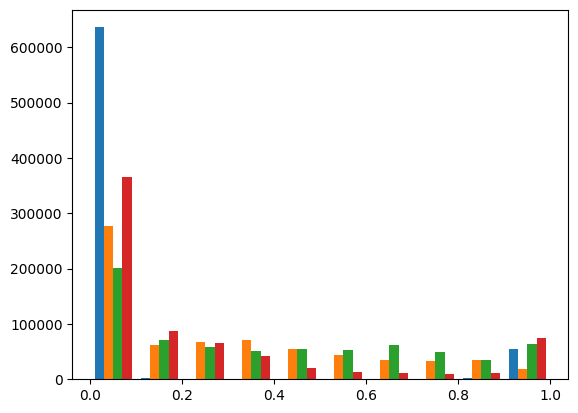

In [101]:
plt.hist(arrrrr)

In [94]:
i2 = arrrrr[:, :1]

In [96]:
i1.shape

(697972, 2)

In [97]:
np.hstack((i2,i1))

array([[1.0000001 , 0.        , 0.        ],
       [1.0000001 , 0.        , 0.        ],
       [1.0000001 , 0.        , 0.        ],
       ...,
       [0.        , 0.4000001 , 0.60000014],
       [0.        , 0.60000014, 0.4000001 ],
       [0.        , 0.35000005, 0.65000015]], dtype=float32)